1. Data Ingesiton

2. Eda of the data

3. processing of the data

4. model building

5. model evalution

# Data Ingestion

Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Check the datatype of the index and convert it to datetime if necessary.

Set the datetime column as the index of the dataframe.


In [67]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
data = pd.read_csv('TSLA.CSV')

In [44]:
#univariate time series
#multivariate time series

In [45]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


In [46]:
#univariate time series
stock_data = data[['Date', 'Close']]

In [47]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


## 1. Data Ingestion

In [48]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [49]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [50]:
#convering object to  Datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [51]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
stock_data = stock_data.set_index("Date")

In [54]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [55]:
# why we are convering date time columns as index column
# 1. I can easily retriev a data
# 2. Visualization is also simple
# 3. those lib has been degine in such a way it required date column as a index(scipy statsmodel)

## 2. EDA of Data 

# EDA(exploratory data analysis)

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

In [56]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


In [57]:
import matplotlib.pyplot as plt
import numpy as np

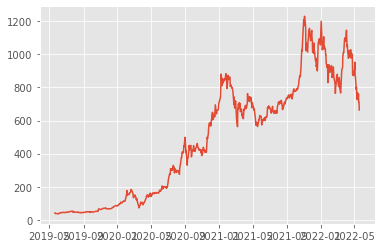

In [58]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

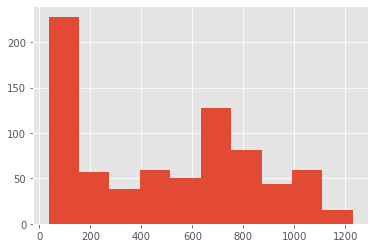

In [59]:
plt.hist(stock_data.Close)

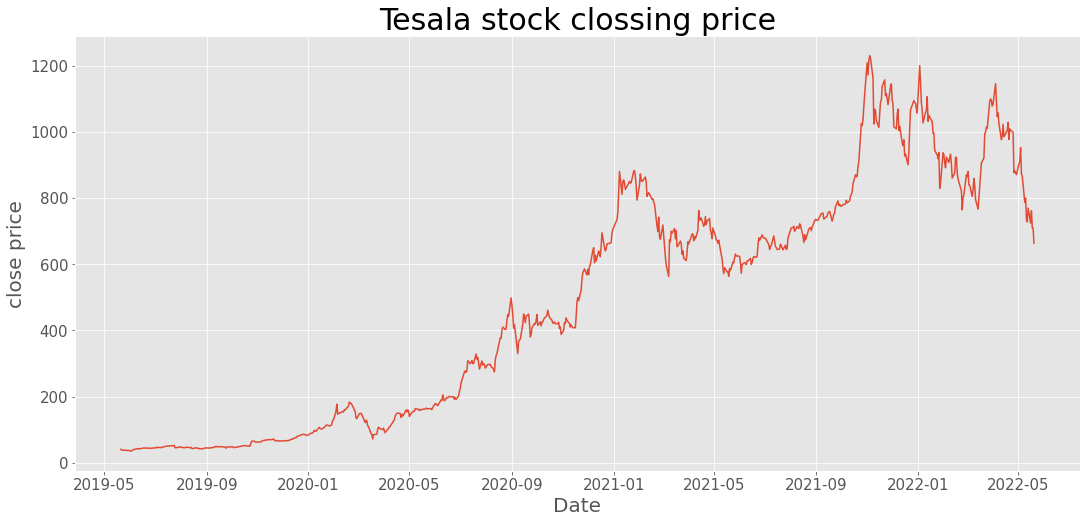

In [68]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Date", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data['Close'])
plt.title("Tesala stock clossing price", fontsize=30)
plt.show()

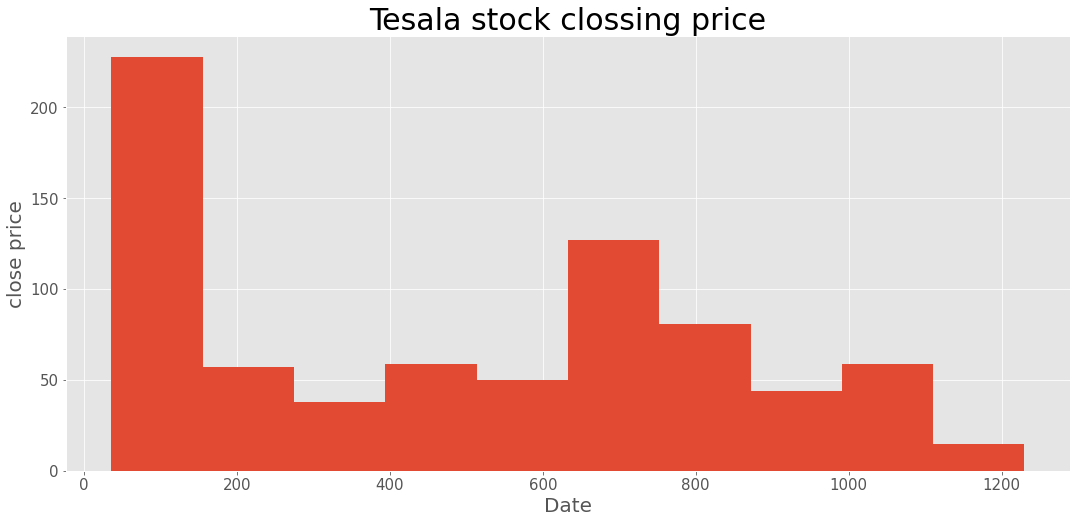

In [69]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Date", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize = 15) 
plt.hist(stock_data['Close'])
plt.title("Tesala stock clossing price", fontsize=30)
plt.show()

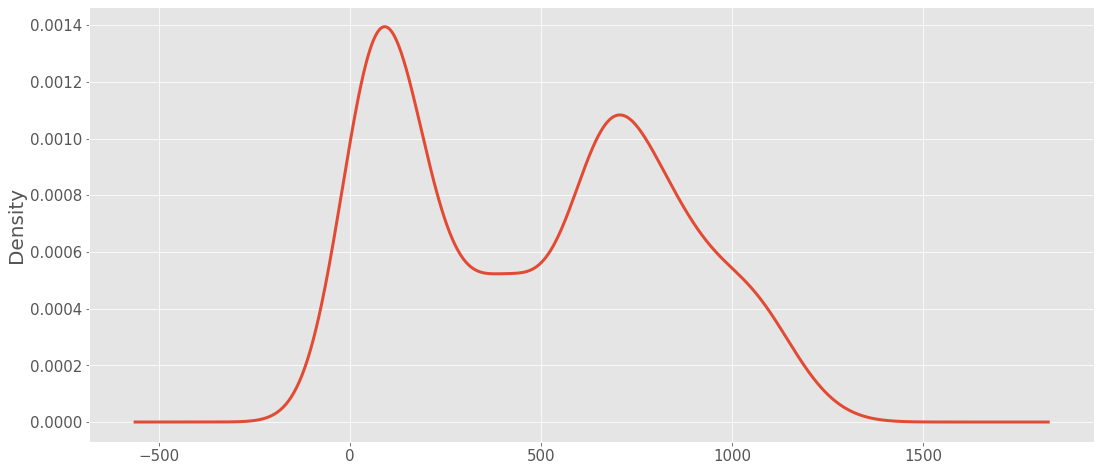

In [70]:
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [62]:
stock_data['Close'].rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [40]:
roll_mean = stock_data['Close'].rolling(12).mean()

In [41]:
stock_data['Close'].rolling(3).std()

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23     1.296425
2019-05-24     0.487492
2019-05-28     0.699754
                ...    
2022-05-16    25.125547
2022-05-17    24.136242
2022-05-18    26.714694
2022-05-19    30.019958
2022-05-20    26.394268
Name: Close, Length: 758, dtype: float64

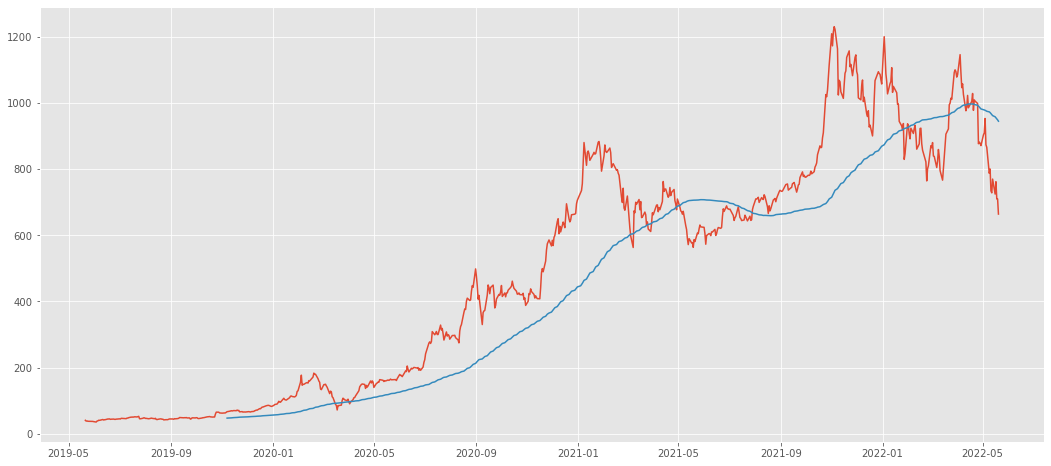

In [42]:

plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(roll_mean)
plt.show()

In [63]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data['Close'])

In [64]:
adft

(-1.363008581703749,
 0.5998762543050697,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [65]:
pd.Series(adft[0:4], index=['test stats', 'p-value', 'lag', 'Data Points'])

test stats      -1.363009
p-value          0.599876
lag              9.000000
Data Points    748.000000
dtype: float64

In [71]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

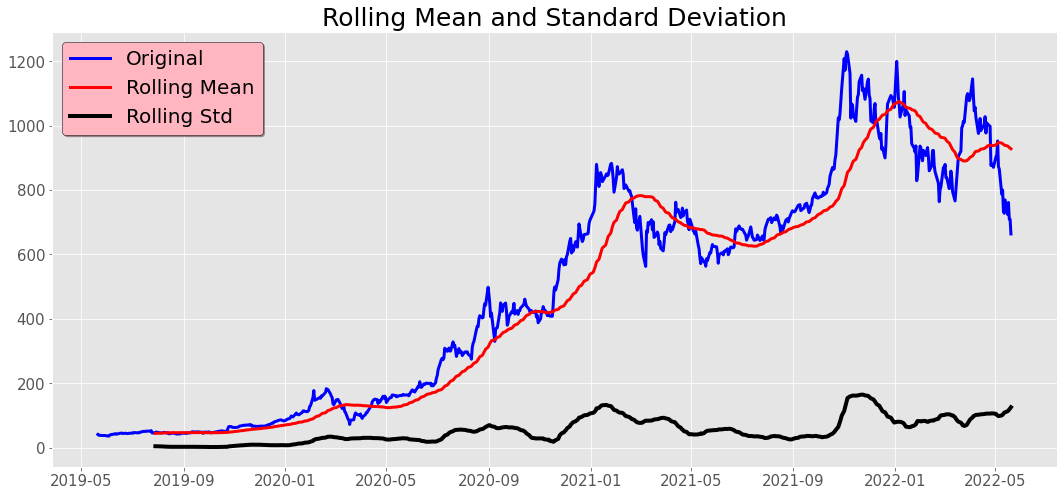

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [72]:
test_stationarity(stock_data.Close)

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data['Close'], period=30)

<Figure size 1440x1440 with 0 Axes>

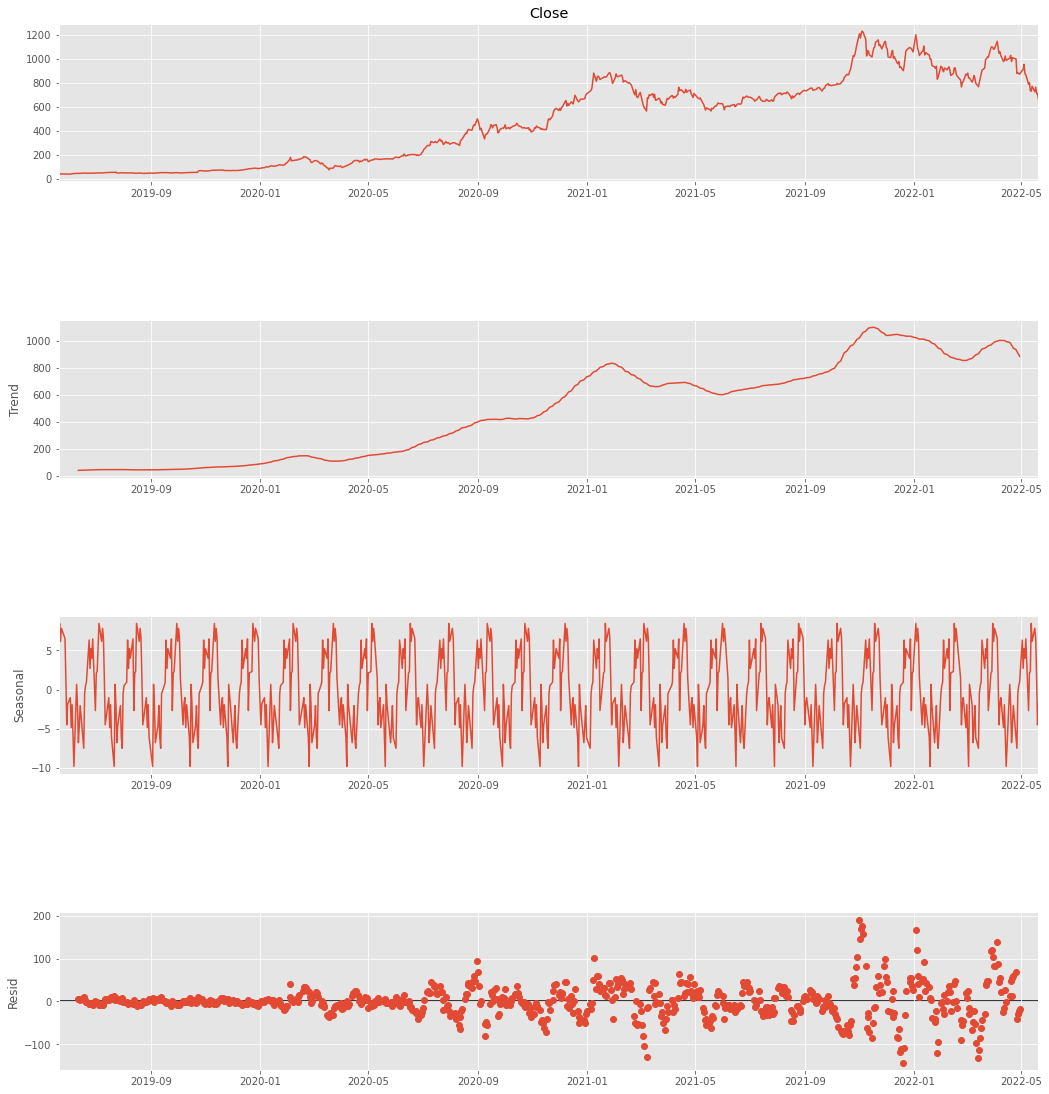

In [78]:
plt.figure(figsize=(20,20))
fig = result.plot()
fig.set_size_inches(17, 18)

In [74]:
result.seasonal

Date
2019-05-21    2.317701
2019-05-22    8.439826
2019-05-23    6.163890
2019-05-24    7.817719
2019-05-28    6.539408
                ...   
2022-05-16    7.817719
2022-05-17    6.539408
2022-05-18    1.508873
2022-05-19   -4.468046
2022-05-20   -1.826385
Name: seasonal, Length: 758, dtype: float64

In [75]:
result.resid

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: resid, Length: 758, dtype: float64